In [16]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')

## declaring tools

In [6]:
def add(a: int, b: int) -> int:
    """
    Add the two numbers
    args:
        a : first integer
        b : second integer
    """
    return a + b

def mult(a: int, b: int) -> int:
    """
    Multiply the two numbers
    args:
        a : first integer
        b : second integer
    """
    return a * b

def divide(a: int, b: int) -> float:
    """
    divide the two numbers
    args:
        a : first integer
        b : second integer
    """
    return a / b

In [7]:
tools = [add, mult, divide]

## invoking model

In [9]:
from langchain_groq import ChatGroq
LLM = ChatGroq(model = "llama-3.1-8b-instant")

## Bind the model with the LLM

In [10]:
llm_with_tools = LLM.bind_tools(tools)

In [ ]:
def llm_tool()

## Creating the stageGraph and nodes

In [17]:
from pydantic import BaseModel
from langgraph.graph.message import add_messages
from typing import Annotated

class State(BaseModel):
    messages: Annotated[list, add_messages]

In [28]:
def llm_tool(state: State):
    return {'messages': [llm_with_tools.invoke(state.messages)]}

# Building the Graph

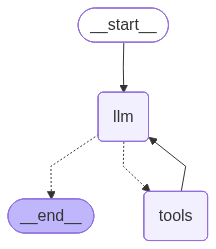

In [30]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import display, Image

memory = MemorySaver()

builder = StateGraph(State)
builder.add_node('llm', llm_tool)
builder.add_node('tools', ToolNode(tools))

builder.add_edge(START, 'llm')
builder.add_conditional_edges('llm', tools_condition)
builder.add_edge('tools', 'llm')
builder.add_edge('llm', END)

graph = builder.compile(checkpointer=memory)


display(Image(graph.get_graph().draw_mermaid_png()))




In [34]:
config = {
    "configurable" : {
        "thread_id": '1'
    }
}

In [39]:
from langchain_core.messages import HumanMessage
from pprint import pprint

In [41]:
msg = HumanMessage(content="add 6 snd 10")
msg = graph.invoke({"messages": msg}, config = config)
for m in msg['messages']:
    m.pretty_print()

================================ Human Message =================================

add 6 snd 10
================================== Ai Message ==================================
Tool Calls:
  add (h5kbwcr1d)
 Call ID: h5kbwcr1d
  Args:
    a: 6
    b: 10
================================= Tool Message =================================
Name: add

16
================================== Ai Message ==================================

The result of the function 'add' with arguments 6 and 10 is 16.
================================ Human Message =================================

add 6 snd 10
================================== Ai Message ==================================
Tool Calls:
  add (tafw54p9n)
 Call ID: tafw54p9n
  Args:
    a: 6
    b: 10
================================= Tool Message =================================
Name: add

16
================================== Ai Message ==================================

The result of the function 'add' with arguments 6 and 10 is 16.
============

In [42]:
msg = HumanMessage(content="nuw multiply it with 10")
msg = graph.invoke({"messages": msg}, config = config)
for m in msg['messages']:
    m.pretty_print()

================================ Human Message =================================

add 6 snd 10
================================== Ai Message ==================================
Tool Calls:
  add (h5kbwcr1d)
 Call ID: h5kbwcr1d
  Args:
    a: 6
    b: 10
================================= Tool Message =================================
Name: add

16
================================== Ai Message ==================================

The result of the function 'add' with arguments 6 and 10 is 16.
================================ Human Message =================================

add 6 snd 10
================================== Ai Message ==================================
Tool Calls:
  add (tafw54p9n)
 Call ID: tafw54p9n
  Args:
    a: 6
    b: 10
================================= Tool Message =================================
Name: add

16
================================== Ai Message ==================================

The result of the function 'add' with arguments 6 and 10 is 16.
============